#Upload the CSV

In [1]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


#load and inspect data

In [2]:
import pandas as pd

df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#Data Cleaning, Preprocessing, EDA & Visualization

#Remove id column

In [3]:
df = df.drop(['id'],axis=1)

In [4]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### BMI analysis

<Axes: xlabel='bmi', ylabel='Count'>

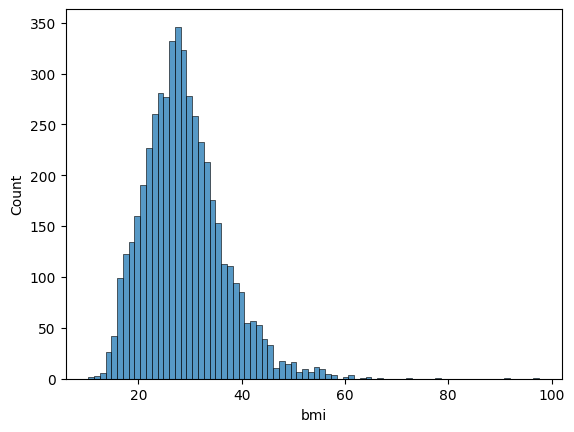

In [5]:
import seaborn as sns

# Graphical representation of bmi attribute
sns.histplot(data=df['bmi'])

<Axes: ylabel='bmi'>

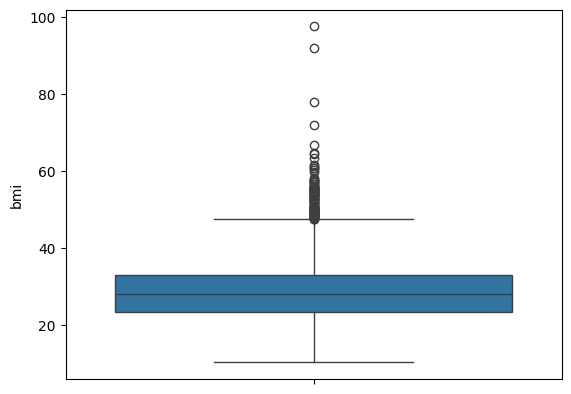

In [6]:
sns.boxplot(data=df['bmi'])

* Based on the histogram and boxplot we see that there are many outliers in bmi

In [7]:
# Finding the count of outliers based on those instances which are out of iqr
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
# Finding IQR
IQR = Q3 - Q1
da=(df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR))
da.value_counts()

,count
bmi,
False,5000
True,110


* Total outliers in bmi : 110
* Total non-outliers in bmi : 5000





#Handle Missing values

In [8]:
#Look for columns with NA values
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


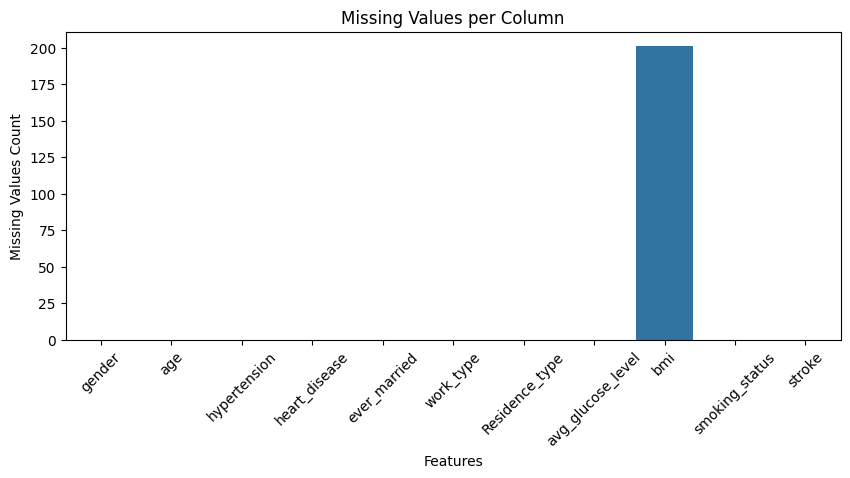

In [9]:
import matplotlib.pyplot as plt

# Plot missing values count
plt.figure(figsize=(10, 4))
sns.barplot(x=df.isnull().sum().index, y=df.isnull().sum().values)
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Missing Values Count")
plt.title("Missing Values per Column")
plt.show()

In [10]:
#Fill missing BMI values with median
df['bmi']=df['bmi'].fillna(df['bmi'].median())

In [11]:
#confirm the missing values are handled
print(df.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


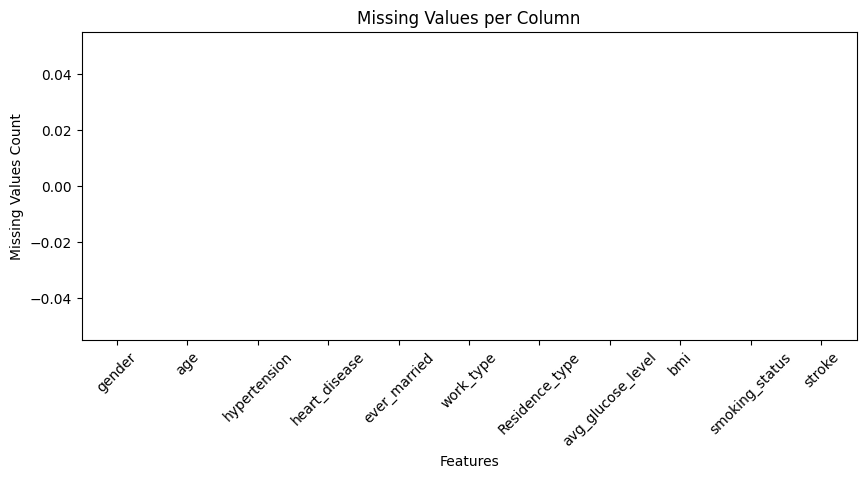

In [12]:
# Plot missing values count
plt.figure(figsize=(10, 4))
sns.barplot(x=df.isnull().sum().index, y=df.isnull().sum().values)
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Missing Values Count")
plt.title("Missing Values per Column")
plt.show()

#Handle Gender Attribute

In [13]:
#check records in gender column
print(df['gender'].value_counts())

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


* We have a 'other' gender and since there is only 1 instance we will remove it as to reduce the dimension of gender(Useful when encoding)

<Axes: ylabel='count'>

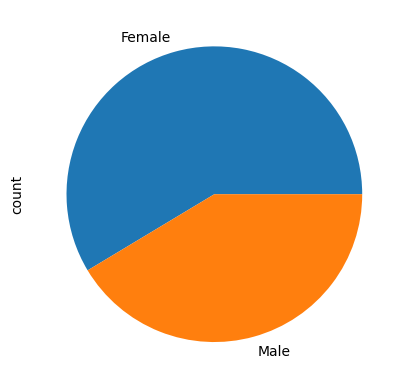

In [14]:
#remove the 'other' gender instance
df['gender']=df['gender'].replace('Other','Female')

#plot the pie chart to see the distribution
df['gender'].value_counts().plot(kind='pie')

### Hyper-tension Analysis

<Axes: xlabel='hypertension'>

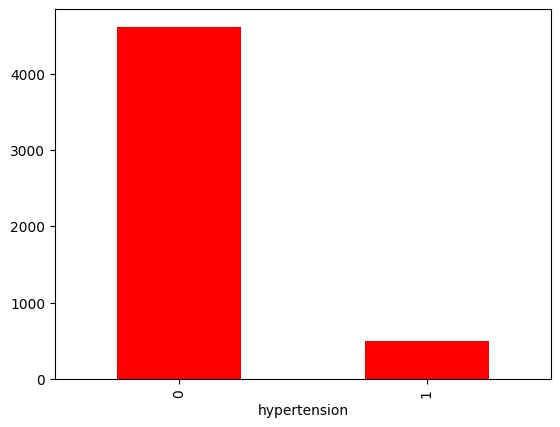

In [15]:
# Graphical representation of the value counts of the hypertension attribute
df['hypertension'].value_counts().plot(kind="bar",color = "red")

### Work type Analysis

In [16]:
# Value of count of work-type attribute
df['work_type'].value_counts()

,count
work_type,
Private,2925
Self-employed,819
children,687
Govt_job,657
Never_worked,22


<Axes: ylabel='count'>

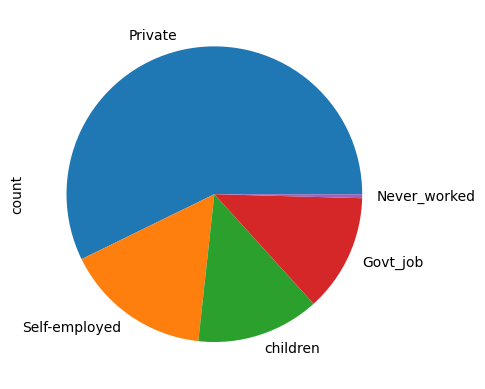

In [17]:
# Graphical representation of the value counts of the work-type attribute
df['work_type'].value_counts().plot(kind="pie")

### Smoking status Analysis

In [18]:
# Value of count of somoking status attribute
df['smoking_status'].value_counts()

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


<Axes: ylabel='count'>

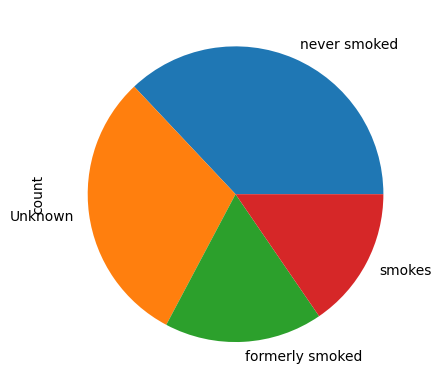

In [19]:
# Graphical representation of the value counts of the smoking staus attribute
df['smoking_status'].value_counts().plot(kind="pie")

### Residence type Analysis

In [20]:
# Value of count of residence attribute
df['Residence_type'].value_counts()

,count
Residence_type,
Urban,2596
Rural,2514


<Axes: ylabel='count'>

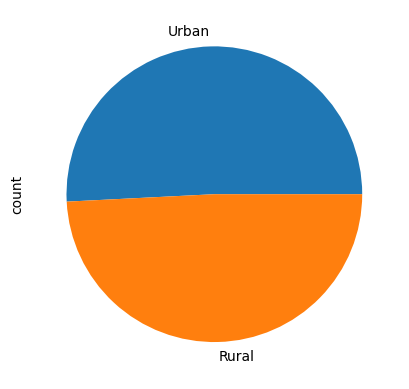

In [21]:
# Graphical representation of the value counts of the residence attribute
df['Residence_type'].value_counts().plot(kind="pie")

### AGE analysis

<Axes: xlabel='age', ylabel='Count'>

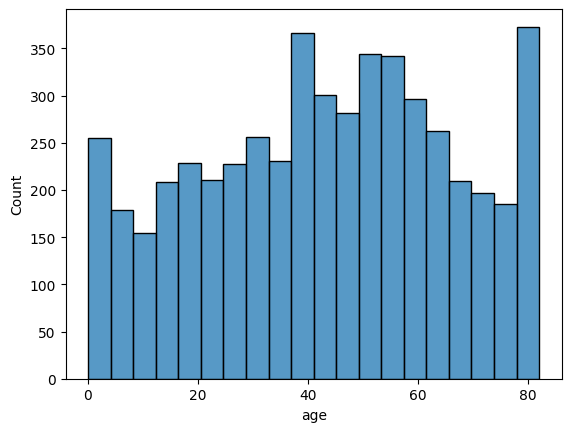

In [22]:
# Graphical representation for the data in age column
#histogram
sns.histplot(data=df['age'])

<Axes: ylabel='age'>

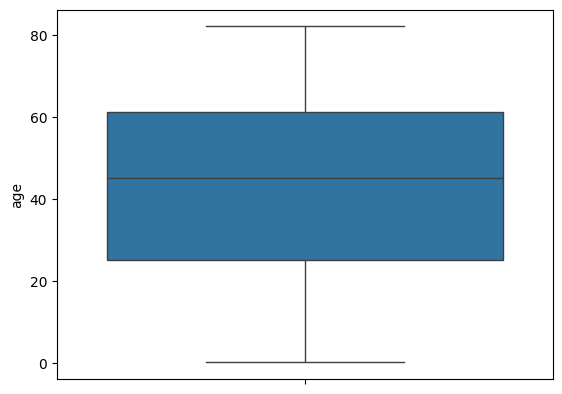

In [23]:
#boxplot
sns.boxplot(data=df['age'])

* The age parameter values does not have any outliers
* And has a normal distribution

### AVERAGE GLUCOSE LEVEL Analysis

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

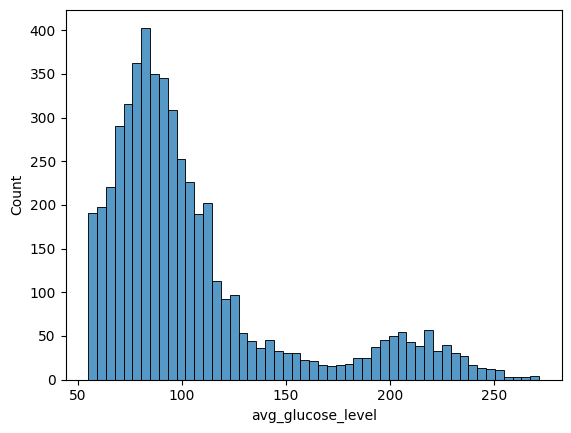

In [24]:
# Graphical representation for the data in glucose level column
# histogram
sns.histplot(data=df['avg_glucose_level'])

<Axes: ylabel='avg_glucose_level'>

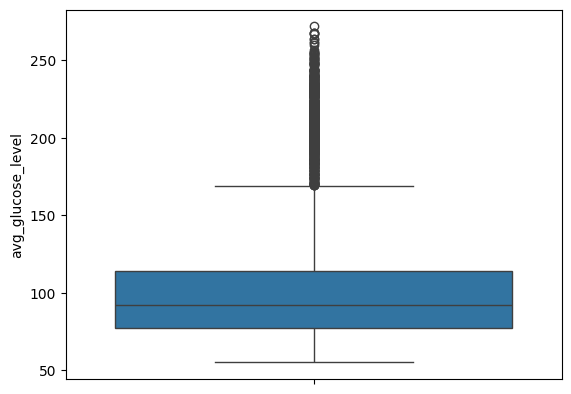

In [25]:
#boxplot
sns.boxplot(data=df['avg_glucose_level'])

* There are many outliers present based on the boxplot and histogram
* The data is positively skewed

In [26]:
# Finding the count of outliers based on those instances which are out of iqr
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
da=(df['avg_glucose_level'] < (Q1 - 1.5 * IQR)) | (df['avg_glucose_level'] > (Q3 + 1.5 * IQR))
da.value_counts()

,count
avg_glucose_level,
False,4483
True,627


* Total outliers in avg_glucose_level : 627
* Total non-outliers in avg_glucose_level : 4483


### Heart_disease analysis

In [27]:
# Value count of heart disease attribute
df['heart_disease'].value_counts()

,count
heart_disease,
0,4834
1,276


<Axes: ylabel='count'>

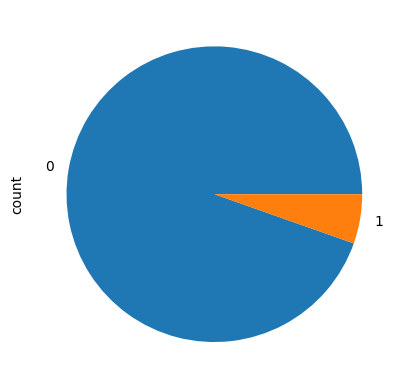

In [28]:
#graphical representation for the data in heart_disease column
df['heart_disease'].value_counts().plot(kind="pie")

### Ever_married analysis

In [29]:
#Value count of evver married attribute
df['ever_married'].value_counts()

,count
ever_married,
Yes,3353
No,1757


<Axes: ylabel='count'>

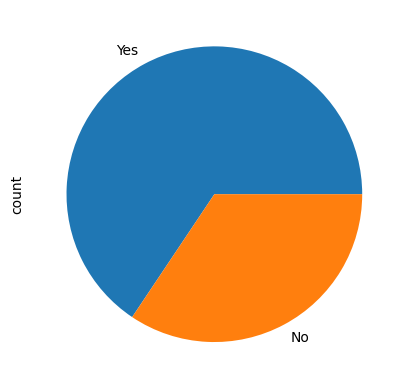

In [30]:
# Graphical representation
df['ever_married'].value_counts().plot(kind="pie")

##Heat Map on numerical features

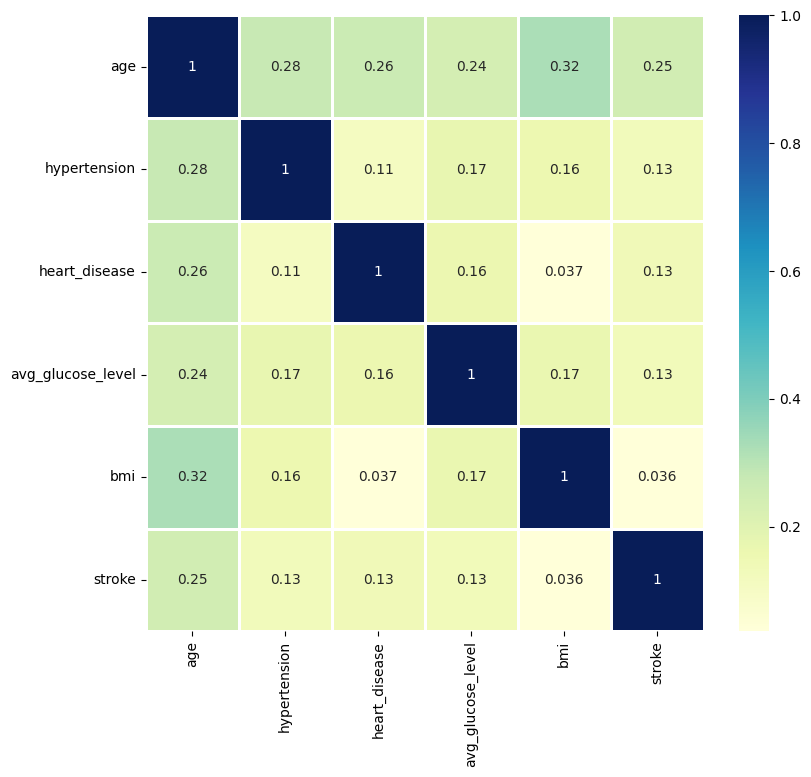

In [31]:
import matplotlib.pyplot as plt


# Select only the numerical columns for correlation
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix between the attributes in the dataset to find if any attributes are correlated
corrmat = numerical_df.corr()
f, ax = plt.subplots(figsize=(9, 8))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidth=0.8, annot=True)
plt.show()

* There is  a weak correlation between the attributes as per the plotted heatmap
* The highest correlation found was between age and bmi - 0.32
* Rest all correlations were less than 0.32


## Target feature Analysis - Stroke

In [32]:
# Value count in the stroke attribute
df['stroke'].value_counts()

,count
stroke,
0,4861
1,249


<Axes: xlabel='stroke'>

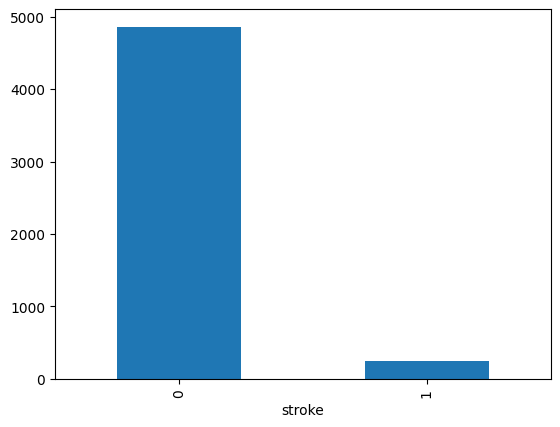

In [33]:
# Graphical representation of the value count distribution of the target attribute
df['stroke'].value_counts().plot(kind="bar")

#Cross analysis - all the attribute compared with target attibute

<Axes: xlabel='stroke', ylabel='count'>

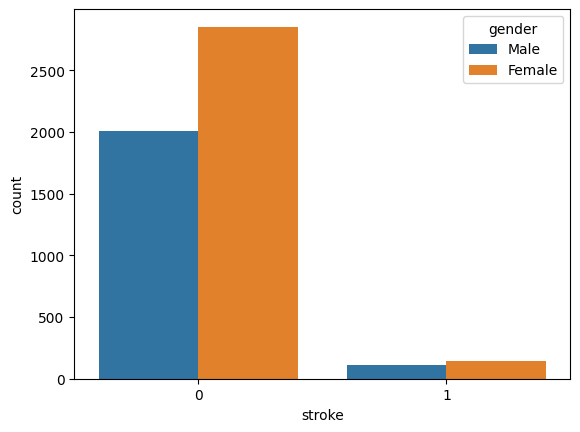

In [34]:
# Comparing stroke with gender
sns.countplot(x='stroke', hue='gender', data=df)

<Axes: xlabel='stroke', ylabel='count'>

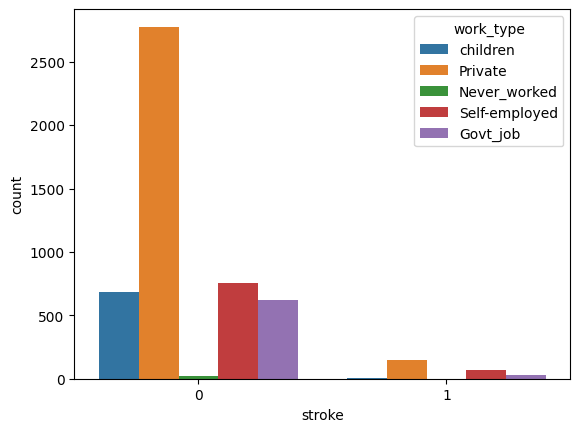

In [35]:
# Comparing stroke with work-type
sns.countplot(x='stroke', hue='work_type', data=df)

* Based on this comparison we see in the provided dataset that people who never worked never got a heart attack and the people who are privetly employed got more strokes

<Axes: xlabel='stroke', ylabel='count'>

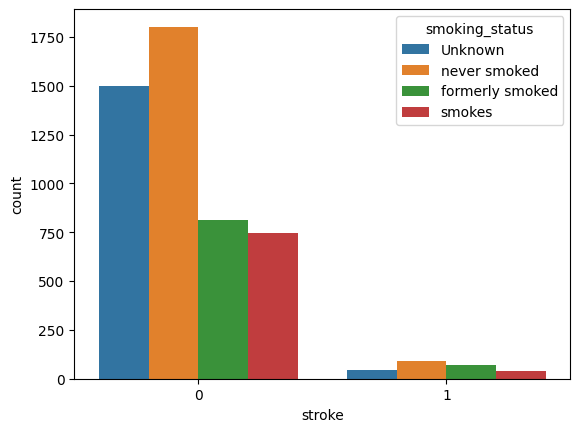

In [36]:
# Comparing stroke with somking_status
sns.countplot(x='stroke', hue='smoking_status', data=df)

* Based on the plot we can that those who formerly smoked got more strokes The people who smoked and never smoked has a somewhat same probability of getting stroke

<Axes: xlabel='stroke', ylabel='count'>

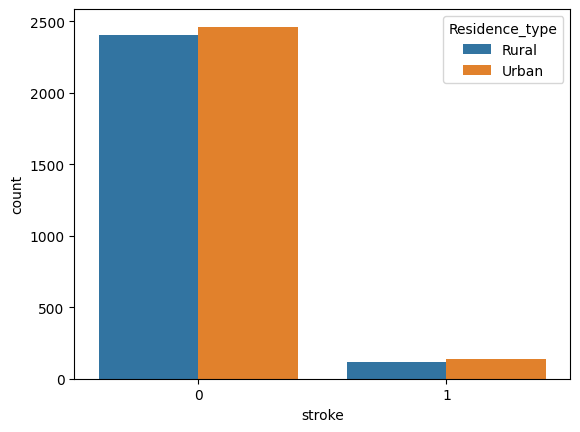

In [37]:
# Comparing stroke with residence type
sns.countplot(x='stroke', hue='Residence_type', data=df)

* Based on the analysis the people who live in Urban areas were reported with more strokes

<Axes: xlabel='stroke', ylabel='count'>

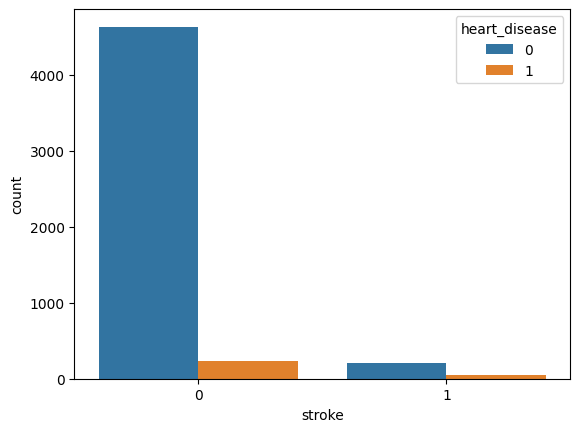

In [38]:
# Comparing stroke with heart disease
sns.countplot(x='stroke', hue='heart_disease', data=df)

###This shows most of the people with no heart disease are suffering with Strokes compared to the once who have Heart Disease.

<Axes: xlabel='stroke', ylabel='count'>

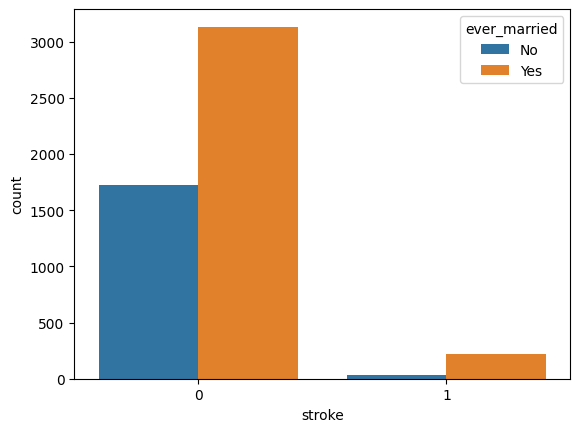

In [39]:
# Comparing stroke with married status
sns.countplot(x='stroke', hue='ever_married', data=df)

###This shows most of the Married people got Strokes compared to Unmarried people.

#Removing outliers

In [40]:
# Remove outliers in 'bmi' based on IQR
Q1_bmi = df['bmi'].quantile(0.25)
Q3_bmi = df['bmi'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi

df_cleaned = df[~((df['bmi'] < (Q1_bmi - 1.5 * IQR_bmi)) | (df['bmi'] > (Q3_bmi + 1.5 * IQR_bmi)))]

print("Shape of DataFrame before removing outliers:", df.shape)
print("Shape of DataFrame after removing outliers:", df_cleaned.shape)

Shape of DataFrame before removing outliers: (5110, 11)
Shape of DataFrame after removing outliers: (4984, 11)


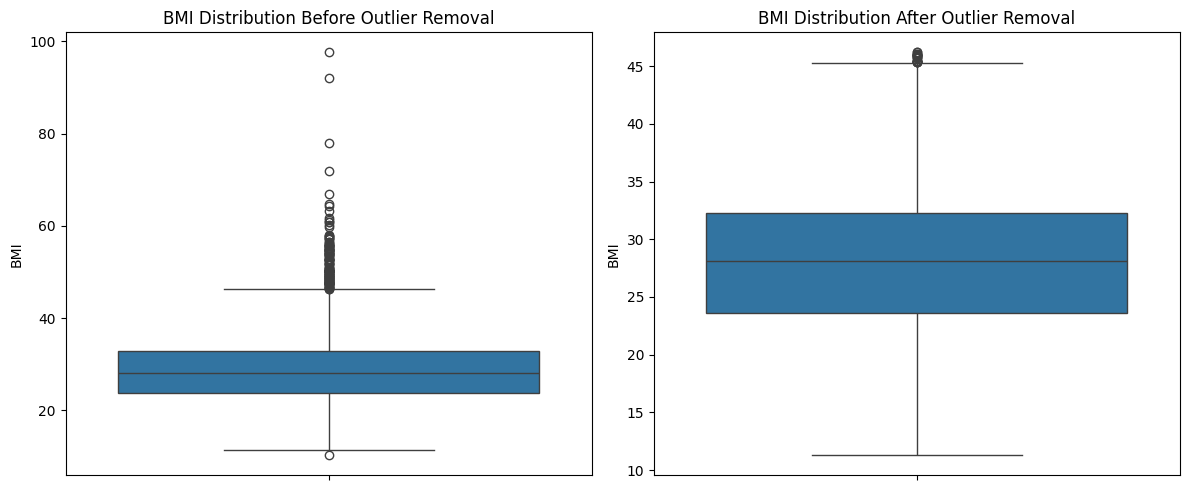

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# Boxplot before removing outliers
plt.subplot(1, 2, 1)
sns.boxplot(data=df['bmi'])
plt.title('BMI Distribution Before Outlier Removal')
plt.ylabel('BMI')

# Boxplot after removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned['bmi'])
plt.title('BMI Distribution After Outlier Removal')
plt.ylabel('BMI')

plt.tight_layout()
plt.show()

In [42]:
# Remove outliers in 'avg_glucose_level' based on IQR
Q1_avg_glucose_level = df['avg_glucose_level'].quantile(0.25)
Q3_avg_glucose_level = df['avg_glucose_level'].quantile(0.75)
IQR_avg_glucose_level = Q3_avg_glucose_level - Q1_avg_glucose_level

df_cleaned_glucose = df[~((df['avg_glucose_level'] < (Q1_avg_glucose_level - 1.5 * IQR_avg_glucose_level)) | (df['avg_glucose_level'] > (Q3_avg_glucose_level + 1.5 * IQR_avg_glucose_level)))]

print("Shape of DataFrame before removing outliers:", df.shape)
print("Shape of DataFrame after removing outliers:", df_cleaned_glucose.shape)

Shape of DataFrame before removing outliers: (5110, 11)
Shape of DataFrame after removing outliers: (4483, 11)


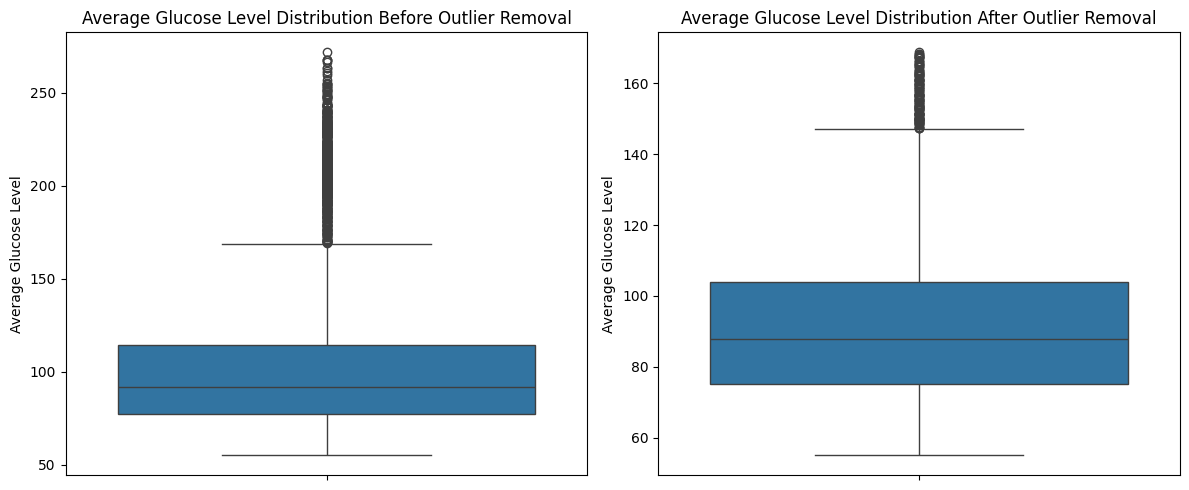

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# Boxplot before removing outliers
plt.subplot(1, 2, 1)
sns.boxplot(data=df['avg_glucose_level'])
plt.title('Average Glucose Level Distribution Before Outlier Removal')
plt.ylabel('Average Glucose Level')

# Boxplot after removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned_glucose['avg_glucose_level'])
plt.title('Average Glucose Level Distribution After Outlier Removal')
plt.ylabel('Average Glucose Level')

plt.tight_layout()
plt.show()

#Encode categorical varibales(One Hot Encoding)

In [44]:
# Select categorical columns to encode
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Perform one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("DataFrame after one-hot encoding:")
display(df.head())

DataFrame after one-hot encoding:


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,True,True,False,True,False,False,True,True,False,False
1,61.0,0,0,202.21,28.1,1,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.5,1,True,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.4,1,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.0,1,False,True,False,False,True,False,False,False,True,False


#Feature engineering (Feature selection and dimension reduction)

## Select features based on importance


Select features with importance scores above a certain threshold.

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Separate features (X) and target variable (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Instantiate and train the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Sort feature importances in descending order
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# Display feature importances
print("Feature Importances:")
display(sorted_feature_importances)

Feature Importances:


,0
avg_glucose_level,0.282399
age,0.247030
bmi,0.231779
Residence_type_Urban,0.033674
gender_Male,0.030765
hypertension,0.026359
heart_disease,0.024729
smoking_status_never smoked,0.023682
work_type_Private,0.021999
smoking_status_formerly smoked,0.020806


In [46]:
# Set a threshold for feature importance
importance_threshold = 0.05 # You can adjust this threshold depending on the model accuracy

# Select features based on the threshold
selected_features = sorted_feature_importances[sorted_feature_importances > importance_threshold].index.tolist()

print(f"Selected features (importance > {importance_threshold}):")
print(selected_features)

# Create a new DataFrame with only the selected features and the target variable
# Use 'stroke' as the target column as it was not one-hot encoded
if 'stroke' in df.columns:
    df_selected = df[selected_features + ['stroke']]
else:
    print("Error: 'stroke' column not found in the DataFrame.")
    df_selected = None


if df_selected is not None:
    print("\nShape of DataFrame with selected features:", df_selected.shape)
    display(df_selected.head())

Selected features (importance > 0.05):
['avg_glucose_level', 'age', 'bmi']

Shape of DataFrame with selected features: (5110, 4)


,avg_glucose_level,age,bmi,stroke
0,228.69,67.0,36.6,1
1,202.21,61.0,28.1,1
2,105.92,80.0,32.5,1
3,171.23,49.0,34.4,1
4,174.12,79.0,24.0,1


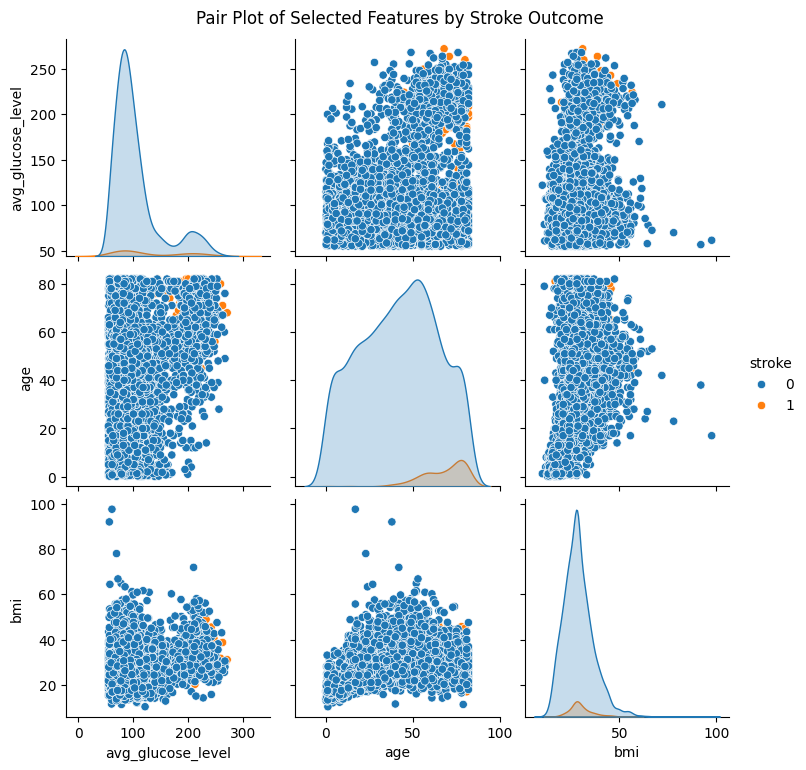

In [47]:
# Visualize the relationships between selected features and the target variable
import seaborn as sns
import matplotlib.pyplot as plt

if df_selected is not None:
    sns.pairplot(df_selected, hue='stroke', diag_kind='kde')
    plt.suptitle('Pair Plot of Selected Features by Stroke Outcome', y=1.02)
    plt.show()
else:
    print("DataFrame with selected features is not available.")

#Split train/test to apply SMOTE to training set

In [48]:
from sklearn.model_selection import train_test_split

X = df.drop('stroke', axis=1)
y = df['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Apply SMOTE

In [49]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Shape of X_train before SMOTE:", X_train.shape)
print("Shape of X_train after SMOTE:", X_train_smote.shape)
print("Shape of y_train before SMOTE:", y_train.shape)
print("Shape of y_train after SMOTE:", y_train_smote.shape)

Shape of X_train before SMOTE: (4088, 15)
Shape of X_train after SMOTE: (7802, 15)
Shape of y_train before SMOTE: (4088,)
Shape of y_train after SMOTE: (7802,)


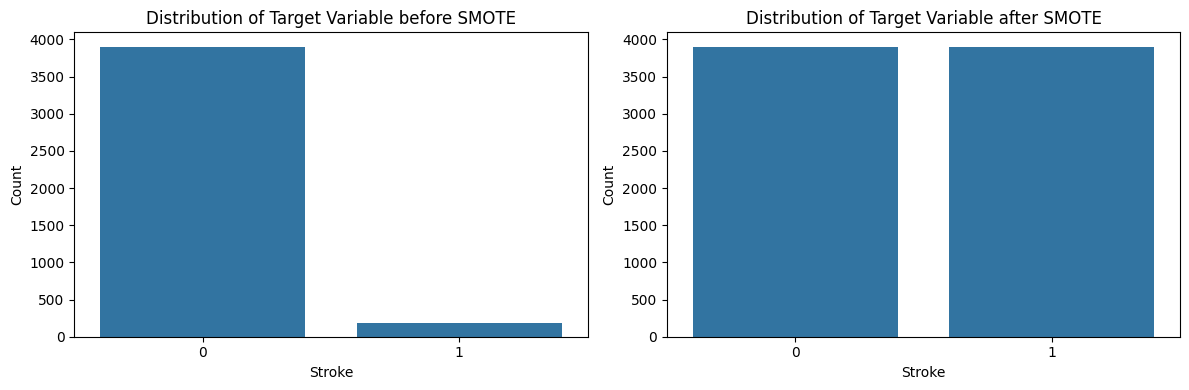

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the target variable before and after SMOTE
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train) # Visualize before SMOTE
plt.title('Distribution of Target Variable before SMOTE')
plt.xlabel('Stroke')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x=y_train_smote) # Visualize after SMOTE
plt.title('Distribution of Target Variable after SMOTE')
plt.xlabel('Stroke')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

##Scaling numeric values

In [51]:
# importing a scaling modeule
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
# Scaling the numeric attributes
df[['bmi', 'avg_glucose_level', 'age']] = s.fit_transform(df[['bmi', 'avg_glucose_level', 'age']])



*   Since the numeric attributes in the dataset is in different ranges we are usign a scaler to get all the values into the same range.




##Visualize the scaled features

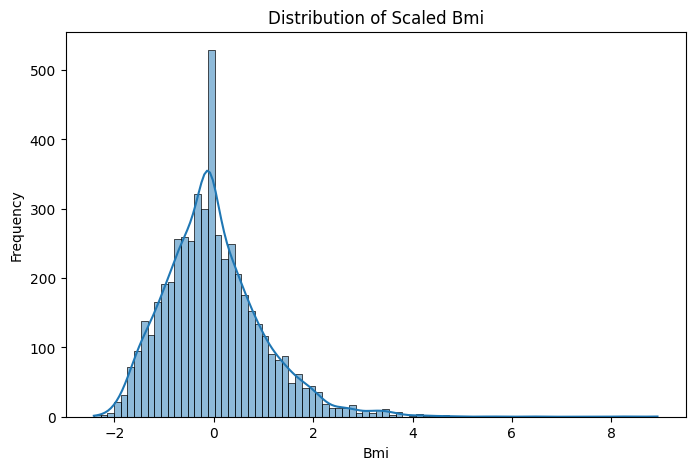

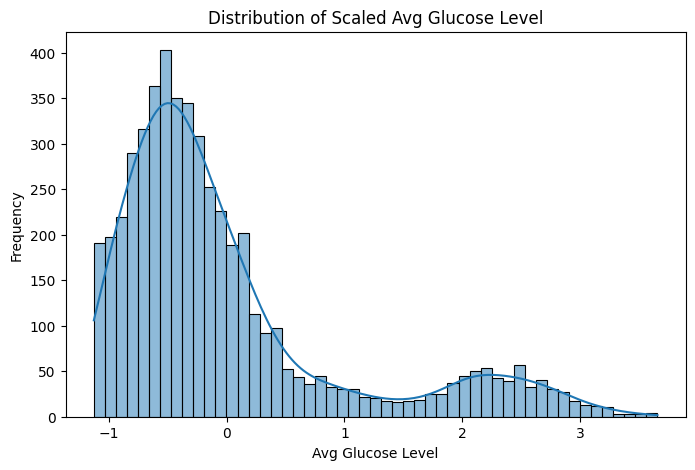

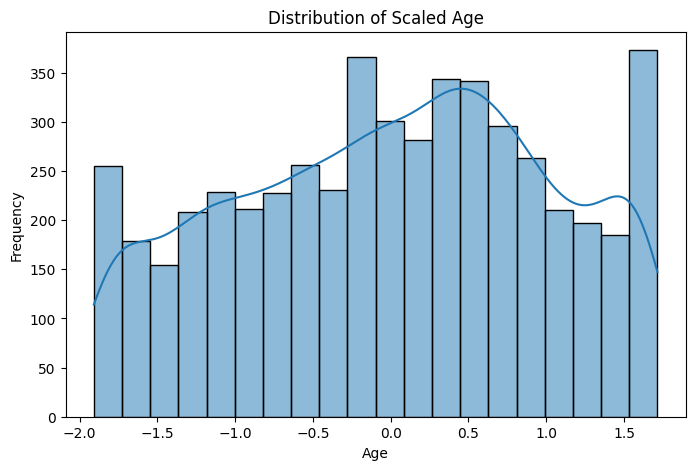

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distributions of scaled numeric columns
scaled_cols = ['bmi', 'avg_glucose_level', 'age']
for col in scaled_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of Scaled {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Frequency')
    plt.show()

## Consider Dimensionality Reduction with PCA

Apply PCA to the selected features to reduce dimensionality.

Original number of features: 3
Reduced number of features (after PCA): 2


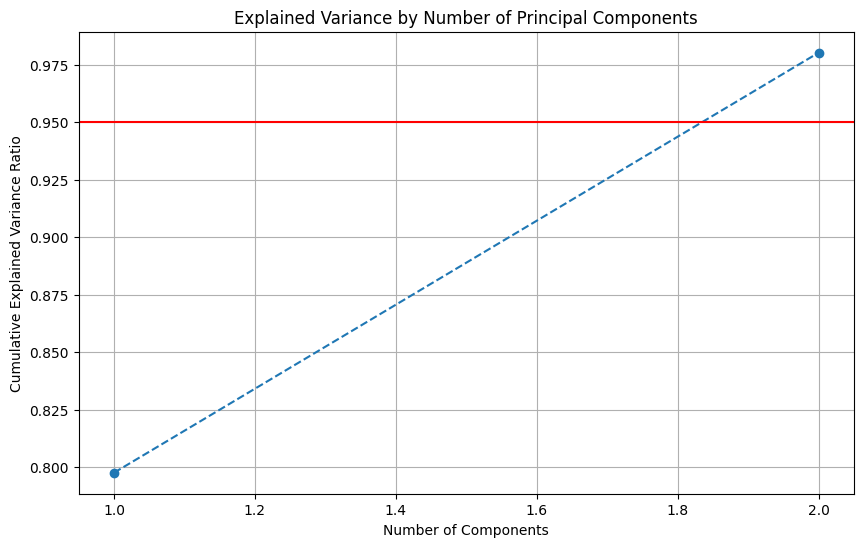

In [53]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Separate features (X) and target variable (y)
X_selected = df_selected.drop('stroke', axis=1)
y = df_selected['stroke']

# Apply PCA and keep enough components to explain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_selected)

print("Original number of features:", X_selected.shape[1])
print("Reduced number of features (after PCA):", X_pca.shape[1])

# Explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1),
         cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')  # 95% threshold line
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

##Save the preprocesed dataset

In [54]:
from google.colab import drive
drive.mount('/content/drive')
df.to_csv("/content/drive/MyDrive/preprocessed_stroke_dataset.csv", index=False)


MessageError: Error: credential propagation was unsuccessful

#Training Models

##Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

#create classifier object
clf = DecisionTreeClassifier(random_state=42)

#Train the classifier
clf.fit(X_train_smote, y_train_smote)

#predict the result using test data
y_pred = clf.predict(X_test)

#calculate accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8894324853228963


##KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier

# Create the classifier object
knn = KNeighborsClassifier(n_neighbors=2)

# Training the classifier
knn.fit(X_train_smote, y_train_smote)

#predicting result using the test dataset
y_pred = knn.predict(X_test)

#calculate accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8835616438356164


##XGBoost

In [69]:
from xgboost  import XGBClassifier

# Create the classifier object
xgb = XGBClassifier()

# Training the classifier
xgb.fit(X_train_smote, y_train_smote)

# predicting result using the test dataset
y_pred_xgb = xgb.predict(X_test)

# Printing the accuracy and roc-auc score of the model
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_xgb))

Accuracy: 0.9119373776908023


##Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create the classifier object
rf_clf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets
rf_clf.fit(X_train_smote, y_train_smote)

# performing predictions on the test dataset
y_pred_rf = rf_clf.predict(X_test)

# Printing accuracy of the model
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_rf))



Accuracy: 0.9266144814090019


##Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Create the classifier object
lgr_clf = LogisticRegression(random_state = 42,max_iter=10000)

# Train the model using the training sets
lgr_clf.fit(X_train_smote, y_train_smote)

# performing predictions on the test dataset
y_pred_lr = lgr_clf.predict(X_test)

# Printing accuracy of the model
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_lr))

Accuracy: 0.837573385518591


##LightGBM




In [71]:
from lightgbm import LGBMClassifier
from sklearn import metrics

# Create the classifier object
lgbm_clf = LGBMClassifier()

# Train the model using the training sets
lgbm_clf.fit(X_train_smote, y_train_smote)

# Performing predictions on the test dataset
y_pred_lgbm = lgbm_clf.predict(X_test)

# Printing accuracy of the model
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_lgbm))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3901, number of negative: 3901
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 789
[LightGBM] [Info] Number of data points in the train set: 7802, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.9099804305283757


##Cross validation + Hyper parameter tuning

##For Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Decision Tree classifier with class imbalance handled
dt_clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Hyperparameter grid for RandomizedSearchCV
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 21),
    'min_samples_split': np.arange(2, 21),
    'min_samples_leaf': np.arange(1, 21),
    'max_features': ['sqrt', 'log2', None]
}

# RandomizedSearchCV with cross-validation
random_search_dt = RandomizedSearchCV(
    dt_clf,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit to training data (using the SMOTE-resampled data)
random_search_dt.fit(X_train_smote, y_train_smote)

# Best parameters
best_params_dt = random_search_dt.best_params_

# Train final Decision Tree on full training set (using the SMOTE-resampled data)
best_dt_clf = DecisionTreeClassifier(**best_params_dt, class_weight='balanced', random_state=42)
best_dt_clf.fit(X_train_smote, y_train_smote)

# Predict on test set (using the original test data)
y_pred_dt_tuned = best_dt_clf.predict(X_test)

# Metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt_tuned)
precision_dt = precision_score(y_test, y_pred_dt_tuned, zero_division=0)
recall_dt = recall_score(y_test, y_pred_dt_tuned, zero_division=0)
f1_dt = f1_score(y_test, y_pred_dt_tuned, zero_division=0)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt_tuned)

print("Decision Tree (Tuned with Class Balance)")
print("Best Parameters:", best_params_dt)
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-Score:", f1_dt)
print("ROC-AUC:", roc_auc_dt)

Decision Tree (Tuned with Class Balance)
Best Parameters: {'splitter': 'best', 'min_samples_split': np.int64(13), 'min_samples_leaf': np.int64(2), 'max_features': None, 'max_depth': np.int64(14), 'criterion': 'entropy'}
Accuracy: 0.8972602739726028
Precision: 0.24705882352941178
Recall: 0.3387096774193548
F1-Score: 0.2857142857142857
ROC-AUC: 0.636021505376344


##For KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# KNN classifier
knn_clf = KNeighborsClassifier()

# Hyperparameter grid
param_grid = {
    'n_neighbors': np.arange(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# GridSearchCV with cross-validation
grid_search_knn = GridSearchCV(
    knn_clf,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit to training data (using the SMOTE-resampled data)
grid_search_knn.fit(X_train_smote, y_train_smote)

# Best parameters
best_params_knn = grid_search_knn.best_params_

# Train final KNN on full training set (using the SMOTE-resampled data)
best_knn_clf = KNeighborsClassifier(**best_params_knn)
best_knn_clf.fit(X_train_smote, y_train_smote)

# Predict on test set (using the original test data)
y_pred_knn_tuned = best_knn_clf.predict(X_test)

# Metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn_tuned)
precision_knn = precision_score(y_test, y_pred_knn_tuned, zero_division=0)
recall_knn = recall_score(y_test, y_pred_knn_tuned, zero_division=0)
f1_knn = f1_score(y_test, y_pred_knn_tuned, zero_division=0)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn_tuned)

print("KNN (Tuned with Class Balance)")
print("Best Parameters:", best_params_knn)
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-Score:", f1_knn)
print("ROC-AUC:", roc_auc_knn)

KNN (Tuned with Class Balance)
Best Parameters: {'metric': 'manhattan', 'n_neighbors': np.int64(2), 'weights': 'uniform'}
Accuracy: 0.8855185909980431
Precision: 0.22772277227722773
Recall: 0.3709677419354839
F1-Score: 0.2822085889570552
ROC-AUC: 0.6448588709677419


##For XGBoost

In [64]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# XGBoost classifier
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(100, 1001, 100),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': np.arange(3, 11),
    'min_child_weight': np.arange(1, 11),
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.001, 0.01, 0.1, 1, 10],
    'reg_lambda': [0, 0.001, 0.01, 0.1, 1, 10]
}

# RandomizedSearchCV with cross-validation
random_search_xgb = RandomizedSearchCV(
    xgb_clf,
    param_distributions=param_dist,
    n_iter=10, # Number of parameter settings that are sampled.
    cv=5,      # 5-fold cross-validation
    scoring='accuracy',
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Fit to training data (using the SMOTE-resampled data)
random_search_xgb.fit(X_train_smote, y_train_smote)

# Best parameters
best_params_xgb = random_search_xgb.best_params_

# Train final XGBoost on full training set (using the SMOTE-resampled data)
best_xgb_clf = XGBClassifier(**best_params_xgb, random_state=42, use_label_encoder=False, eval_metric='logloss')
best_xgb_clf.fit(X_train_smote, y_train_smote)

# Predict on test set (using the original test data)
y_pred_xgb_tuned = best_xgb_clf.predict(X_test)

# Metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb_tuned)
precision_xgb = precision_score(y_test, y_pred_xgb_tuned, zero_division=0)
recall_xgb = recall_score(y_test, y_pred_xgb_tuned, zero_division=0)
f1_xgb = f1_score(y_test, y_pred_xgb_tuned, zero_division=0)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb_tuned)

print("XGBoost (Tuned with Class Balance)")
print("Best Parameters:", best_params_xgb)
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1-Score:", f1_xgb)
print("ROC-AUC:", roc_auc_xgb)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:22:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:22:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost (Tuned with Class Balance)
Best Parameters: {'subsample': 0.9, 'reg_lambda': 0.01, 'reg_alpha': 1, 'n_estimators': np.int64(900), 'min_child_weight': np.int64(2), 'max_depth': np.int64(6), 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.7}
Accuracy: 0.9158512720156555
Precision: 0.18421052631578946
Recall: 0.11290322580645161
F1-Score: 0.14
ROC-AUC: 0.5403057795698925


##For Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Random Forest classifier with class imbalance handled
rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Hyperparameter grid
param_dist = {
    'n_estimators': np.arange(100, 1001, 100),
    'max_features': ['sqrt', 'log2'],
    'max_depth': np.arange(10, 110, 10),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(
    rf_clf,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit to training data
random_search.fit(X_train_smote, y_train_smote)

# Best parameters
best_params_rf = random_search.best_params_

# Train final Random Forest on full training set
best_rf_clf = RandomForestClassifier(**best_params_rf, class_weight='balanced', random_state=42)
best_rf_clf.fit(X_train_smote, y_train_smote)

# Predict on test set
y_pred_rf_tuned = best_rf_clf.predict(X_test)

# Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf_tuned)
precision_rf = precision_score(y_test, y_pred_rf_tuned)
recall_rf = recall_score(y_test, y_pred_rf_tuned)
f1_rf = f1_score(y_test, y_pred_rf_tuned)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_tuned)

print("Random Forest (Tuned with Class Balance)")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-Score:", f1_rf)
print("ROC-AUC:", roc_auc_rf)


Random Forest (Tuned with Class Balance)
Accuracy: 0.9266144814090019
Precision: 0.2903225806451613
Recall: 0.14516129032258066
F1-Score: 0.1935483870967742
ROC-AUC: 0.561122311827957


##For Logistic Regression

Logistic Regression (Tuned with Class Balance)
Accuracy: 0.8405088062622309
Precision: 0.16993464052287582
Recall: 0.41935483870967744
F1-Score: 0.24186046511627907
ROC-AUC: 0.6435315860215054


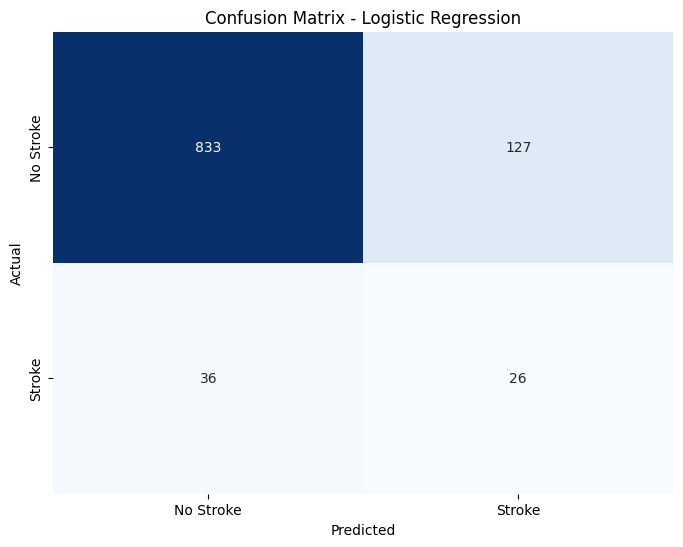

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression classifier with class imbalance handled
lgr_clf = LogisticRegression(class_weight='balanced', random_state=0, max_iter=1000)

# Hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# GridSearchCV with cross-validation
grid_search = GridSearchCV(
    lgr_clf,
    param_grid,
    cv=5,
    scoring='accuracy'
)

# Fit to training data
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters
best_params_lr = grid_search.best_params_

# Train final Logistic Regression on full training set
best_lgr_clf = LogisticRegression(**best_params_lr, class_weight='balanced', random_state=0, max_iter=1000)
best_lgr_clf.fit(X_train_smote, y_train_smote)

# Predict on test set
y_pred_lr_tuned = best_lgr_clf.predict(X_test)

# Metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr_tuned)
precision_lr = precision_score(y_test, y_pred_lr_tuned)
recall_lr = recall_score(y_test, y_pred_lr_tuned)
f1_lr = f1_score(y_test, y_pred_lr_tuned)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr_tuned)

print("Logistic Regression (Tuned with Class Balance)")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-Score:", f1_lr)
print("ROC-AUC:", roc_auc_lr)

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

##For lightGBM

In [73]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# LightGBM classifier with class imbalance handled
lgbm_clf = LGBMClassifier(class_weight='balanced', random_state=0)

# Hyperparameter grid
param_grid = {
    'num_leaves': [15, 31, 63],
    'max_depth': [-1, 5, 10, 15],
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# GridSearchCV with cross-validation
grid_search = GridSearchCV(
    lgbm_clf,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit to training data
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters
best_params_lgbm = grid_search.best_params_

# Train final LightGBM model on full training set
best_lgbm_clf = LGBMClassifier(**best_params_lgbm, class_weight='balanced', random_state=0)
best_lgbm_clf.fit(X_train_smote, y_train_smote)

# Predict on test set
y_pred_lgbm_tuned = best_lgbm_clf.predict(X_test)

# Metrics
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm_tuned)
precision_lgbm = precision_score(y_test, y_pred_lgbm_tuned)
recall_lgbm = recall_score(y_test, y_pred_lgbm_tuned)
f1_lgbm = f1_score(y_test, y_pred_lgbm_tuned)
roc_auc_lgbm = roc_auc_score(y_test, y_pred_lgbm_tuned)

print("LightGBM (Tuned with Class Balance)")
print("Accuracy:", accuracy_lgbm)
print("Precision:", precision_lgbm)
print("Recall:", recall_lgbm)
print("F1-Score:", f1_lgbm)
print("ROC-AUC:", roc_auc_lgbm)


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3901, number of negative: 3901
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 789
[LightGBM] [Info] Number of data points in the train set: 7802, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3901, number of negative: 3901
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `forc

##Model Comparison


In [80]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

results = {
    'Model': [
        'Logistic Regression (Baseline)',
        'Random Forest (Baseline)',
        'KNN (Baseline)',
        'XGBoost (Baseline)',
        'LightGBM (Baseline)',
        'Logistic Regression (Tuned with Class Balance)',
        'Random Forest (Tuned with Class Balance)',
        'Decision Tree (Tuned with Class Balance)',
        'KNN (Tuned with Class Balance)',
        'XGBoost (Tuned with Class Balance)',
        'LightGBM (Tuned with Class Balance)'
    ],
    'Cross-Validation Accuracy': [
        None,
        None,
        None,
        None,
        None,
        grid_search.best_score_,
        random_search.best_score_,
        random_search_dt.best_score_,
        grid_search_knn.best_score_,
        random_search_xgb.best_score_,
        grid_search.best_score_
    ],
    'Test Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_lgbm),
        accuracy_score(y_test, y_pred_lr_tuned),
        accuracy_score(y_test, y_pred_rf_tuned),
        accuracy_score(y_test, y_pred_dt_tuned),
        accuracy_score(y_test, y_pred_knn_tuned),
        accuracy_score(y_test, y_pred_xgb_tuned),
        accuracy_score(y_test, y_pred_lgbm_tuned)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr, zero_division=0),
        precision_score(y_test, y_pred_rf, zero_division=0),
        precision_score(y_test, y_pred, zero_division=0),
        precision_score(y_test, y_pred_xgb, zero_division=0),
        precision_score(y_test, y_pred_lgbm, zero_division=0),
        precision_score(y_test, y_pred_lr_tuned, zero_division=0),
        precision_score(y_test, y_pred_rf_tuned, zero_division=0),
        precision_score(y_test, y_pred_dt_tuned, zero_division=0),
        precision_score(y_test, y_pred_knn_tuned, zero_division=0),
        precision_score(y_test, y_pred_xgb_tuned, zero_division=0),
        precision_score(y_test, y_pred_lgbm_tuned, zero_division=0)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr, zero_division=0),
        recall_score(y_test, y_pred_rf, zero_division=0),
        recall_score(y_test, y_pred, zero_division=0),
        recall_score(y_test, y_pred_xgb, zero_division=0),
        recall_score(y_test, y_pred_lgbm, zero_division=0),
        recall_score(y_test, y_pred_lr_tuned, zero_division=0),
        recall_score(y_test, y_pred_rf_tuned, zero_division=0),
        recall_score(y_test, y_pred_dt_tuned, zero_division=0),
        recall_score(y_test, y_pred_knn_tuned, zero_division=0),
        recall_score(y_test, y_pred_xgb_tuned, zero_division=0),
        recall_score(y_test, y_pred_lgbm_tuned, zero_division=0)

    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr, zero_division=0),
        f1_score(y_test, y_pred_rf, zero_division=0),
        f1_score(y_test, y_pred, zero_division=0),
        f1_score(y_test, y_pred_xgb, zero_division=0),
        f1_score(y_test, y_pred_lgbm, zero_division=0),
        f1_score(y_test, y_pred_lr_tuned, zero_division=0),
        f1_score(y_test, y_pred_rf_tuned, zero_division=0),
        f1_score(y_test, y_pred_dt_tuned, zero_division=0),
        f1_score(y_test, y_pred_knn_tuned, zero_division=0),
        f1_score(y_test, y_pred_xgb_tuned, zero_division=0),
        f1_score(y_test, y_pred_lgbm_tuned, zero_division=0)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_pred_lr),
        roc_auc_score(y_test, y_pred_rf),
        roc_auc_score(y_test, y_pred),
        roc_auc_score(y_test, y_pred_xgb),
        roc_auc_score(y_test, y_pred_lgbm),
        roc_auc_score(y_test, y_pred_lr_tuned),
        roc_auc_score(y_test, y_pred_rf_tuned),
        roc_auc_score(y_test, y_pred_dt_tuned),
        roc_auc_score(y_test, y_pred_knn_tuned),
        roc_auc_score(y_test, y_pred_xgb_tuned),
        roc_auc_score(y_test, y_pred_lgbm_tuned)
    ]
}

# Convert to DataFrame
results_df = pd.DataFrame(results)

print(results_df)

                                             Model  Cross-Validation Accuracy  \
0                   Logistic Regression (Baseline)                        NaN   
1                         Random Forest (Baseline)                        NaN   
2                                   KNN (Baseline)                        NaN   
3                               XGBoost (Baseline)                        NaN   
4                              LightGBM (Baseline)                        NaN   
5   Logistic Regression (Tuned with Class Balance)                   0.871961   
6         Random Forest (Tuned with Class Balance)                   0.959375   
7         Decision Tree (Tuned with Class Balance)                   0.928740   
8                   KNN (Tuned with Class Balance)                   0.933864   
9               XGBoost (Tuned with Class Balance)                   0.959375   
10             LightGBM (Tuned with Class Balance)                   0.871961   

    Test Accuracy  Precisio